**Nome:** Emanuel Victor da Silva Favorato

**Número USP:** 12558151

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as ss
import pylab

**2.** Este exercício utilizará os dados do projeto SENIC ( SENIC.csv), que está descrito no Apêndice C.1 do livro texto [ Applied Linear Statistical Models(5 ed.), J. Neter, W.Wasserman,
eM. Kutner]. O objetivo é explicar o tempo médio (Y) de permanencia de um paciente num hospital em termos das covariáveis fornecidas (veja o livro para as descrições detalhadas). Suponha que o modelo 1 utilize como preditores a idade do paciente (X1), probabilidade
do risco de infecção (X2) e porcentagem de serviços fornecidos (X3). O modelo 2 utilizará número de leitos (X1), probabilidade do risco de infecção (X2) e porcentagem de serviços fornecidos (X3).

In [ ]:
df = pd.read_csv('SENIC.csv')
df

,id,tempo,idade,risco_infeccao,cultura,x_ray,numero_camas,afiliacao,regiao,census,enfermeiras,servicos
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,110,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,111,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,112,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


**(a)** Para cada um dos modelos, crie scatter plots das covariaveis e visualize as correlações entre elas. Descreva esses resultados brevemente.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

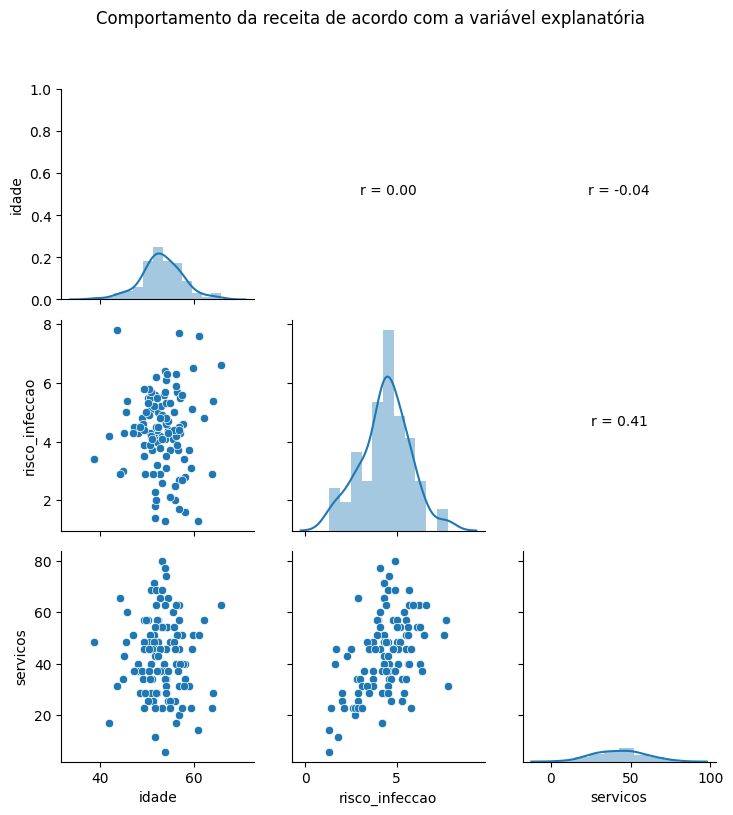

In [ ]:
# Criando o modelo 1
Y = df['tempo']
X1 = df[['idade', 'risco_infeccao', 'servicos']]

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction',
                ha='center')
    ax.set_axis_off()

g = sns.PairGrid(X1)
g.fig.suptitle('Comportamento da receita de acordo com a variável explanatória',
               y=1.08)
g.map_diag(sns.distplot)
g.map_lower(sns.scatterplot )
g.map_upper(reg_coef)
plt.show()

Para o modelo 1 observamos que a correlação entre as covariáveis é fraca, |r| < 0.5, sendo que no caso idade - risco_infecção é, aparentemente, inexistente.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

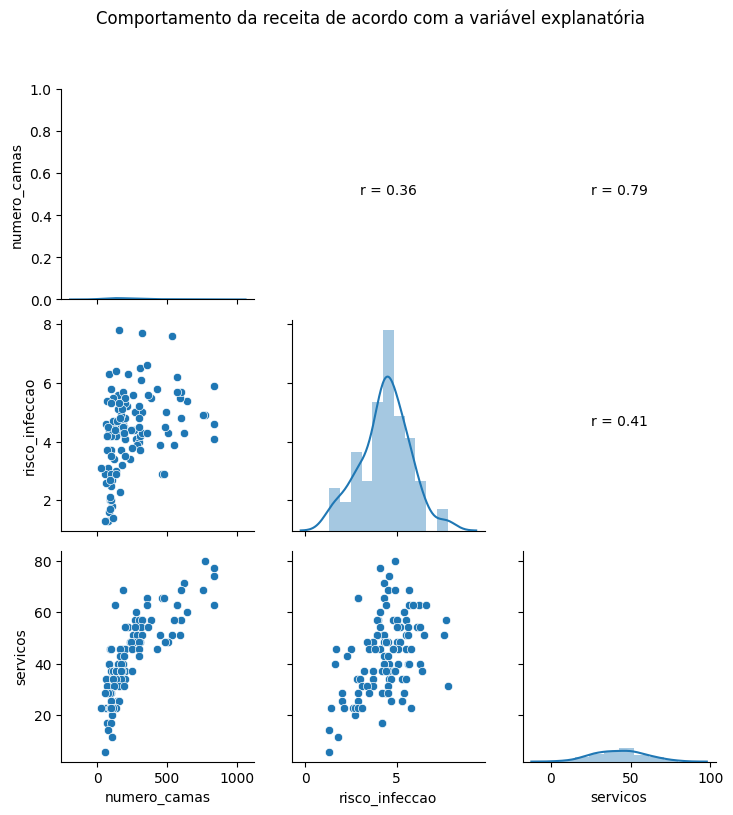

In [ ]:
# Criando o modelo 2
X2 = df[['numero_camas', 'risco_infeccao', 'servicos']]

g = sns.PairGrid(X2)
g.fig.suptitle('Comportamento da receita de acordo com a variável explanatória',
               y=1.08)
g.map_diag(sns.distplot)
g.map_lower(sns.scatterplot )
g.map_upper(reg_coef)
plt.show()

Já no modelo 2 observamos correlações mais significativas, sendo que em serviços - número_camas é possível observar correlação forte |r| > 0.7.

**(b)** Para cada um dos modelos, ajuste um modelo de regressao linear múltipla [Eq. (1)] com três variáveis preditoras.

In [ ]:
# Ajustando um modelo de regressão.
modelo1 = smf.ols(formula='tempo ~ idade + risco_infeccao + servicos', data=df)
modelo2 = smf.ols(formula='tempo ~ numero_camas + risco_infeccao + servicos', data=df)

resultado1 = modelo1.fit()
resultado2 = modelo2.fit()

**(c)** Calcule R2 para cada modelo. Algum modelo é preferível em termos dessa medida?

In [ ]:
r_squared1 = resultado1.rsquared
print(f'O coeficiente R2 para o modelo 1 é dado por: {round(r_squared1, 3)}')

O coeficiente R2 para o modelo 1 é dado por: 0.345


In [ ]:
r_squared2 = resultado2.rsquared
print(f'O coeficiente R2 para o modelo 2 é dado por: {round(r_squared2, 3)}')

O coeficiente R2 para o modelo 2 é dado por: 0.341


Não se observa diferença significativa entre os modelos no que tange ao coeficiente R2, embora o coeficiente do primeiro modelo tenha se mostrado um pouco superior ao observado no segundo, não podendo-se fazer afirmações sobre a preferência de um modelo em detrimento de outro.

**(d)** Novamente para cada modelo, obtenha os resíduos e visualize-os em função da resposta ajustada $\hat{Y}$ e em função de cada variável preditora (você pode agrupar a dispersão de Xi×ei em um mesmo gráfico, visualizando os pontos de cada covariável de maneira diferente).

In [ ]:
# Obtendo os resíduos para cada modelo
residuos1 = resultado1.resid
residuos2 = resultado2.resid

# Encontrando Y^
Y1 = resultado1.predict()
Y2 = resultado2.predict()

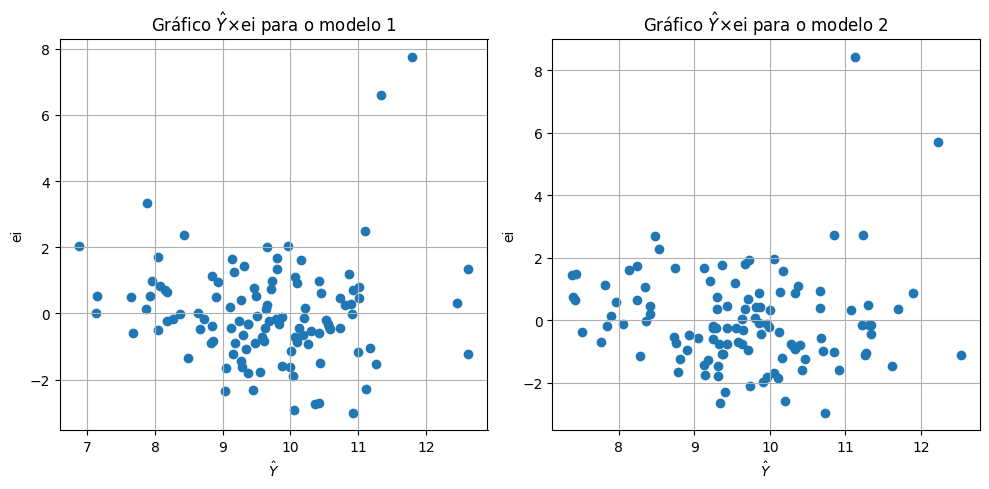

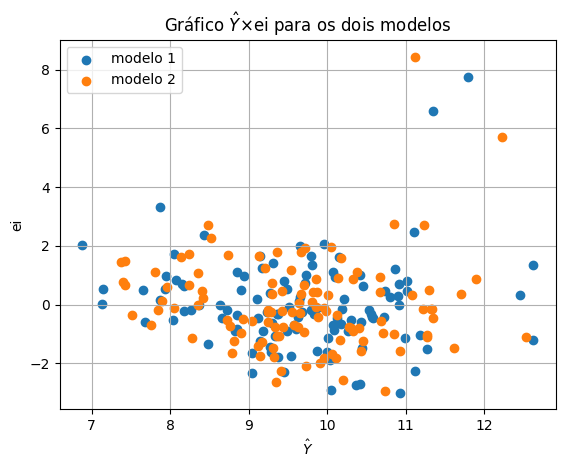

In [ ]:
# Plotando os gráficos em função de Y^ lado a lado
# Criando subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 colunas

# Plotando o primeiro
ax1.scatter(Y1, residuos1)
ax1.set_xlabel('$\hat{Y}$')
ax1.set_ylabel('ei')
ax1.set_title('Gráfico $\hat{Y}$×ei para o modelo 1')
ax1.grid(True)

# Plotando o segundo scatterplot
ax2.scatter(Y2, residuos2)
ax2.set_xlabel('$\hat{Y}$')
ax2.set_ylabel('ei')
ax2.set_title('Gráfico $\hat{Y}$×ei para o modelo 2')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Plotando um gráfico unindo os dois modelos
plt.scatter(Y1, residuos1, label = 'modelo 1')
plt.scatter(Y2, residuos2, label = 'modelo 2')
plt.xlabel('$\hat{Y}$')
plt.ylabel('ei')
plt.title('Gráfico $\hat{Y}$×ei para os dois modelos')

plt.legend()
plt.grid(True)
plt.show()

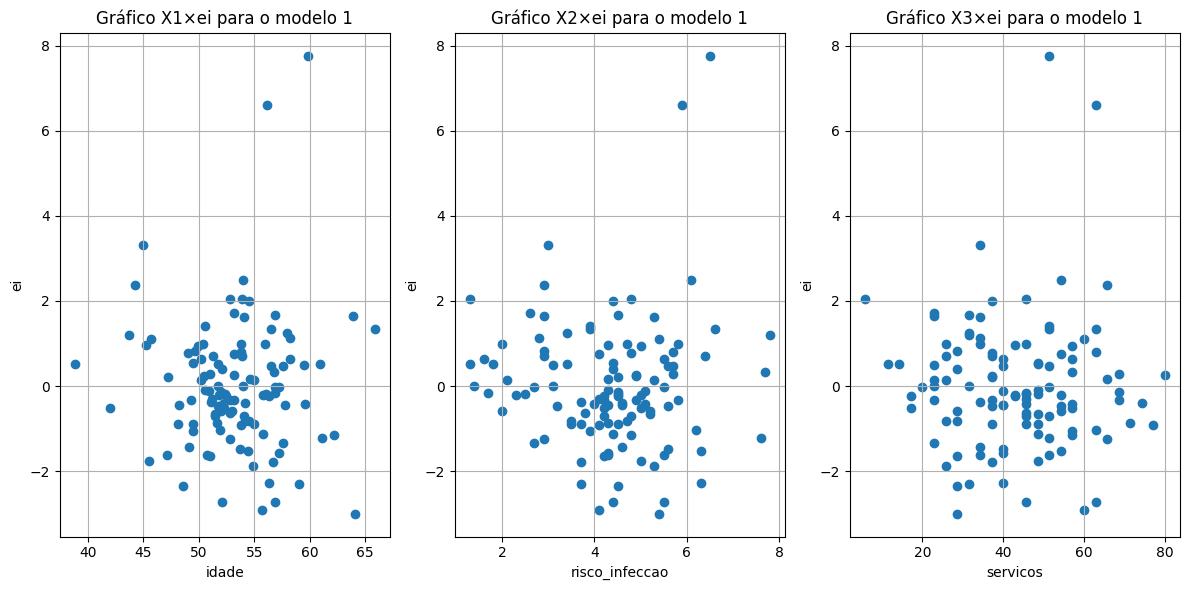

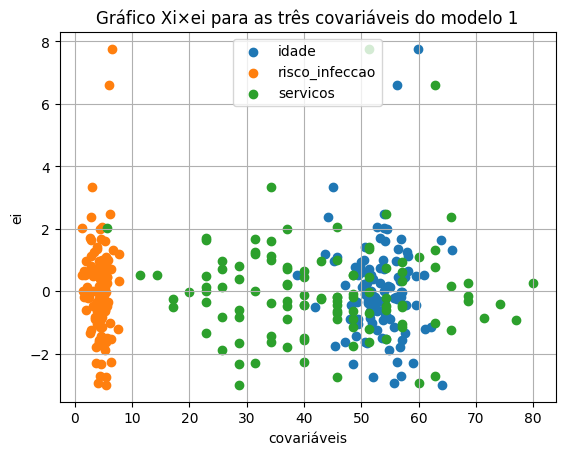

In [ ]:
# Plotando os gráficos em função de cada Xi lado a lado para o modelo 1
# Criando subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))  # 1 linha, 3 colunas

# Plotando o primeiro scatterplot
ax1.scatter(df['idade'], residuos1)
ax1.set_xlabel('idade')
ax1.set_ylabel('ei')
ax1.set_title('Gráfico X1×ei para o modelo 1')
ax1.grid(True)

# Plotando o segundo scatterplot
ax2.scatter(df['risco_infeccao'], residuos1)
ax2.set_xlabel('risco_infeccao')
ax2.set_ylabel('ei')
ax2.set_title('Gráfico X2×ei para o modelo 1')
ax2.grid(True)

# Plotando o terceiro scatterplot
ax3.scatter(df['servicos'], residuos1)
ax3.set_xlabel('servicos')
ax3.set_ylabel('ei')
ax3.set_title('Gráfico X3×ei para o modelo 1')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Plotando um gráfico unindo os resíduos em função das três covariáveis
plt.scatter(df['idade'], residuos1, label = 'idade')
plt.scatter(df['risco_infeccao'], residuos1, label = 'risco_infeccao')
plt.scatter(df['servicos'], residuos1, label = 'servicos')
plt.xlabel('covariáveis')
plt.ylabel('ei')
plt.title('Gráfico Xi×ei para as três covariáveis do modelo 1')

plt.legend()
plt.grid(True)
plt.show()

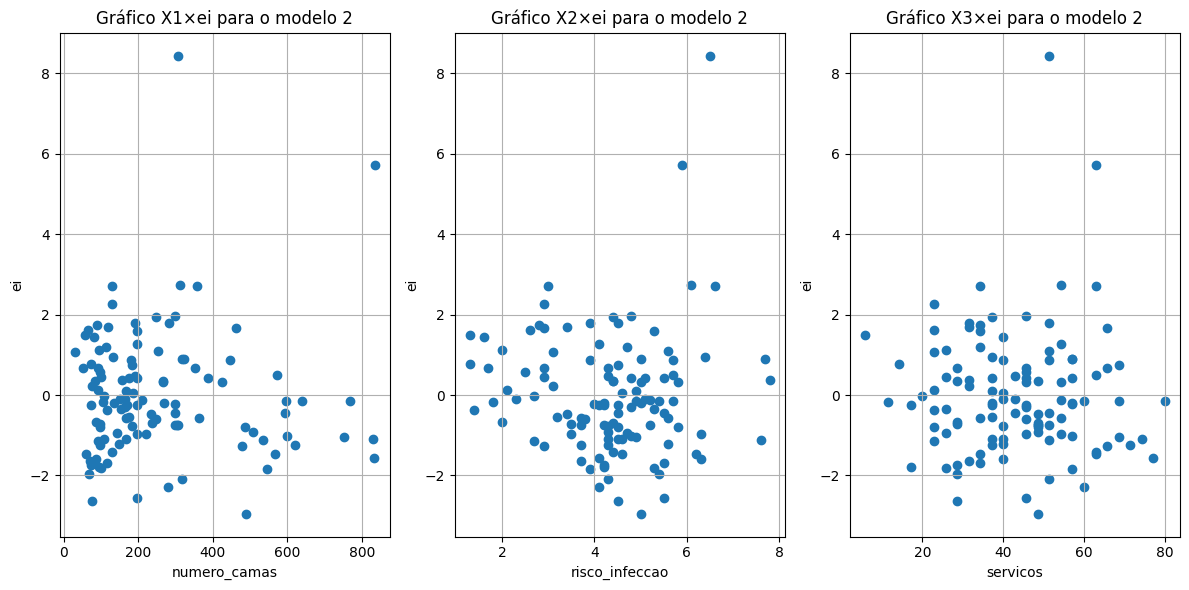

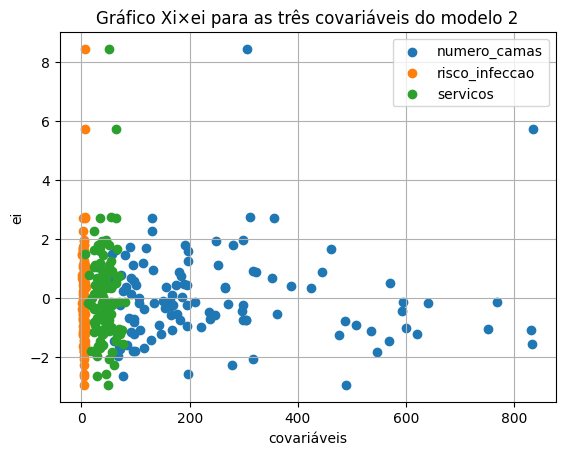

In [ ]:
# Plotando os gráficos em função de cada Xi lado a lado para o modelo 1
# Criando subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))  # 1 linha, 3 colunas

# Plotando o primeiro scatterplot
ax1.scatter(df['numero_camas'], residuos2)
ax1.set_xlabel('numero_camas')
ax1.set_ylabel('ei')
ax1.set_title('Gráfico X1×ei para o modelo 2')
ax1.grid(True)

# Plotando o segundo scatterplot
ax2.scatter(df['risco_infeccao'], residuos2)
ax2.set_xlabel('risco_infeccao')
ax2.set_ylabel('ei')
ax2.set_title('Gráfico X2×ei para o modelo 2')
ax2.grid(True)

# Plotando o terceiro scatterplot
ax3.scatter(df['servicos'], residuos2)
ax3.set_xlabel('servicos')
ax3.set_ylabel('ei')
ax3.set_title('Gráfico X3×ei para o modelo 2')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Plotando um gráfico unindo os resíduos em função das três covariáveis
plt.scatter(df['numero_camas'], residuos2, label = 'numero_camas')
plt.scatter(df['risco_infeccao'], residuos2, label = 'risco_infeccao')
plt.scatter(df['servicos'], residuos2, label = 'servicos')
plt.xlabel('covariáveis')
plt.ylabel('ei')
plt.title('Gráfico Xi×ei para as três covariáveis do modelo 2')

plt.legend()
plt.grid(True)
plt.show()

**(e)** Prepare um QQplot para cada um dos modelos ajustados. Analise os resultados. Algum modelo é mais apropriado em termos da análise dos resíduos?

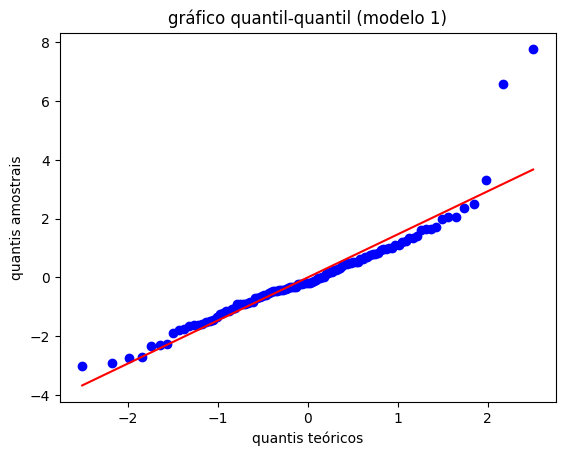

In [ ]:
ss.probplot(residuos1, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 1)')
pylab.show()

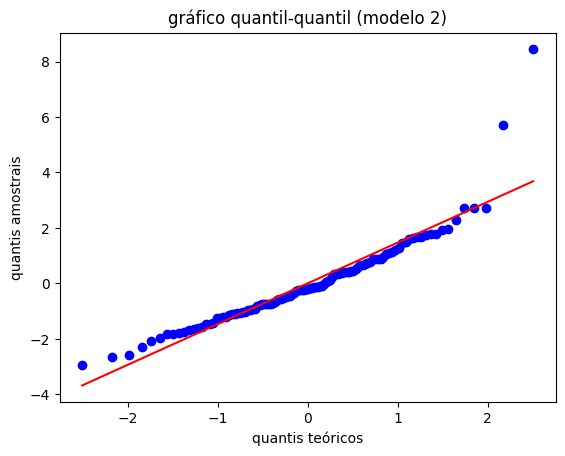

In [ ]:
ss.probplot(residuos2, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 2)')
pylab.show()

Em ambos os modelos, os erros seguem uma distribuição que pode ser considerada normal, não havendo um modelo mais apropriado baseado nessa análise.

**3.** Para este exercício, utilize novamente os dados do projeto SENIC. Considere agora as quatro covariaveis do exercício acima: idade (X1), número de leitos (X2), risco de infecção (X3) e porcentagem de serviços prestados (X4).

**(a)** Crie uma matriz de correlações entre as covariáveis.

In [ ]:
# Criando o modelo 3
Y = df['tempo']
X3 = df[['idade', 'numero_camas', 'risco_infeccao', 'servicos']]

correlation_matrix = X3.corr()

print(correlation_matrix)

                   idade  numero_camas  risco_infeccao  servicos
idade           1.000000     -0.058823        0.001093 -0.040451
numero_camas   -0.058823      1.000000        0.359770  0.794524
risco_infeccao  0.001093      0.359770        1.000000  0.412601
servicos       -0.040451      0.794524        0.412601  1.000000


<Axes: >

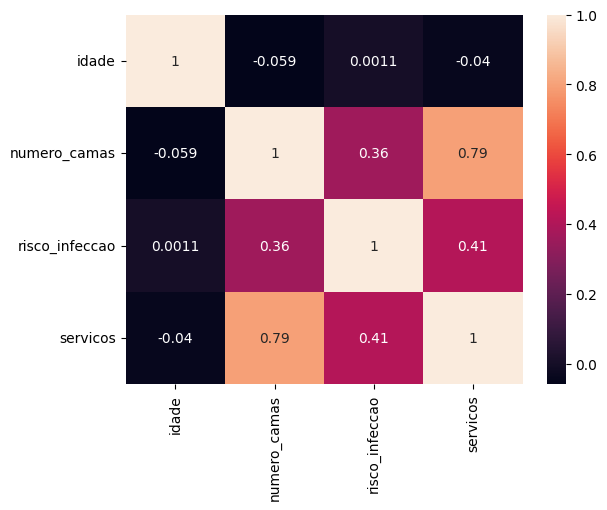

In [ ]:
# Realizando uma análise equivalente com um heatmap, para melhorar a visualização dos dados
sns.heatmap(X3.corr(), annot = True) # Mapa de calor, onde  annot insere os valores dentro das ilhas

**(b)** Ajuste um modelo de regressão para explicar o tempo médio de permanência no hospital apenas em termos da porcentagem de serviços prestados. Qual e o valor do coeficiente e seu erro padrão?

In [ ]:
# Adicionando uma constante à variável independente para incluir β0.
x = sm.add_constant(df['servicos'])

# Ajustando o modelo de regressão linear simples.
model = sm.OLS(Y, x).fit()

# Observando resultados importantes.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     16.06
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000111
Time:                        01:05:08   Log-Likelihood:                -225.41
No. Observations:                 113   AIC:                             454.8
Df Residuals:                     111   BIC:                             460.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7188      0.510     15.129      0.0

O valor do coeficiente β1 é dado por 0.0447 enquanto seu erro padrão é de 0.011.

**(c)** Ajuste um modelo linear agora com as quatro covariáveis e enuncie a função de regressão estimada.

In [ ]:
# Ajustando um modelo de regressão.
modelo3 = smf.ols(formula='tempo ~ idade + numero_camas + risco_infeccao + servicos', data=df)

resultado3 = modelo3.fit()
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     16.71
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.09e-10
Time:                        01:05:08   Log-Likelihood:                -205.83
No. Observations:                 113   AIC:                             421.7
Df Residuals:                     108   BIC:                             435.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8136      1.828      0.

**(d)** Qual a diferença entre o coeficiente da covariável de serviços prestados do modelo ajustado em (b) e (c)? Ambos sao significativos com nível de 95% de confiança? Se encontrar alguma diferença, forneça uma explicação baseada na sua observação feita em (a).

**Resposta:** Em (b), é possível observar que a covariável serviços possui um peso maior na composição do modelo quando comparada ao modelo observado em (c), tal fato se deve à ausência de outras covariáveis explicativas, além disso, para o segundo caso observa-se que a covariável serviços pode ser considerada, a um nível de confiança de 95%, como insignificante, enquanto no primeiro caso não. Também é possível observar, com base no item (a), que serviços possui fraca correlação com variáveis de maior peso no modelo, como risco_infecção e idade, o que explicaria sua insignificância para o mesmo.

**(e)** Forneça uma interpretação para o coeficiente do risco de infecção. Teste, utilizando um α apropriado, a hipotese de que o coeficiente relacionando risco de infecção e tempo de permanencia no hospital seja diferente de zero. Forneça suas conclusões no contexto das variaveis deste problema.

In [ ]:
# Observando os resultados novamente.
print(resultado3.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     16.71
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.09e-10
Time:                        01:05:08   Log-Likelihood:                -205.83
No. Observations:                 113   AIC:                             421.7
Df Residuals:                     108   BIC:                             435.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.8136      1.828      0.

Considerando um nível de significância α = 5%; temos que a hipótese nula deverá ser rejeitada, uma vez que α > valor-p, indicando que o risco de infecção é uma covariável importante para a determinação do tempo de estadia no hospital e apresentando um peso mais significativo na determinação deste do que as demais covariáveis utilizadas para compor o modelo, inclusive outras significativas( como número de camas e idade).

**(f)** Qual é o valor da média dos quadrados dos resíduos? Explique se o modelo se ajusta aos dados de maneira satisfatória.

In [ ]:
mse = model.mse_resid
mse3 = resultado3.mse_resid
print(f'O MSE para o modelo de regrssão linear simples é dado por: {round(mse, 3)}')
print(f'O MSE para o modelo 3 é de: {round(mse3, 3)}')

O MSE para o modelo de regrssão linear simples é dado por: 3.221
O MSE para o modelo 3 é de: 2.341


Atráves da análise da média dos erros quadráticos, temos que o modelo 3(com 4 covariáveis) apresentou uma média menor que o modelo univariado, o que nos permite dizer que este se ajusta de maneira mais satisfatória do que o modelo simples.

**4.** Para este exercício, utilize novamente os dados do projeto SENIC.

**(a)** Para cada região geográfica, ajuste um modelo de regressão (Y) com as covariáveis idade (X1), taxa de culturas coletadas de sinais ou sintomas de terem adquirido
infecção (X2), número médio de pacientes no hospital (census, X3) e número de serviços disponibilizados (X4). Enuncie as funções de regressão encontradas.

In [ ]:
# Criando o modelo 4
Y = df['tempo']

# Criando data_frames vazios
X1 = pd.DataFrame()
X2 = pd.DataFrame()
X3 = pd.DataFrame()
X4 = pd.DataFrame()

# Filtrando dados com base em nossos conhecimentos sobre o número de regiões e incluindo-los no data frame pertinente.
if not df[df['regiao'] == 1].empty:
    X1 = df[df['regiao'] == 1][['tempo', 'idade', 'cultura', 'census', 'servicos']]

if not df[df['regiao'] == 2].empty:
    X2 = df[df['regiao'] == 2][['tempo', 'idade', 'cultura', 'census', 'servicos']]

if not df[df['regiao'] == 3].empty:
    X3 = df[df['regiao'] == 3][['tempo', 'idade', 'cultura', 'census', 'servicos']]

if not df[df['regiao'] == 4].empty:
    X4 = df[df['regiao'] == 4][['tempo', 'idade', 'cultura', 'census', 'servicos']]

In [ ]:
# Ajustando um modelo de regressão.
modelo41 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=X1)

# Observando os resultados e coeficientes do modelo.
resultado41 = modelo41.fit()
print(resultado41.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.658
Date:                Tue, 21 Nov 2023   Prob (F-statistic):            0.00103
Time:                        01:05:08   Log-Likelihood:                -55.947
No. Observations:                  28   AIC:                             121.9
Df Residuals:                      23   BIC:                             128.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3819      5.279     -1.020      0.3

In [ ]:
# Ajustando um modelo de regressão.
modelo42 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=X2)

# Observando os resultados e coeficientes do modelo.
resultado42 = modelo42.fit()
print(resultado42.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4.683
Date:                Tue, 21 Nov 2023   Prob (F-statistic):            0.00532
Time:                        01:05:08   Log-Likelihood:                -42.113
No. Observations:                  32   AIC:                             94.23
Df Residuals:                      27   BIC:                             101.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2179      2.397      3.011      0.0

In [ ]:
# Ajustando um modelo de regressão.
modelo43 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=X3)

# Observando os resultados e coeficientes do modelo.
resultado43 = modelo43.fit()
print(resultado43.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.951
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0350
Time:                        01:05:08   Log-Likelihood:                -53.694
No. Observations:                  37   AIC:                             117.4
Df Residuals:                      32   BIC:                             125.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6406      2.666      1.366      0.1

In [ ]:
# Ajustando um modelo de regressão.
modelo44 = smf.ols(formula='tempo ~ idade + cultura + census + servicos', data=X4)

# Observando os resultados e coeficientes do modelo.
resultado44 = modelo44.fit()
print(resultado44.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.221
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.357
Time:                        01:05:08   Log-Likelihood:                -19.297
No. Observations:                  16   AIC:                             48.59
Df Residuals:                      11   BIC:                             52.46
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1639      4.375      1.180      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Observando as funções de regressão.
print('A função de regressão do modelo 4.1 é dada por: m(x) = -5.3819 + 0.2847*idade -0.0015*cultura + 0.0101*census + -0.0227*servicos')
print('A função de regressão do modelo 4.2 é dada por: m(x) = 7.2179 + 0.0188*idade + 0.0376*cultura + 0.0033*census + 0.0044*servicos')
print('A função de regressão do modelo 4.3 é dada por: m(x) = 3.6406 + 0.083*idade + 0.0591*cultura + 0.0027*census -0.0046*servicos')
print('A função de regressão do modelo 4.4 é dada por: m(x) = 5.1639 + 0.052*idade + 0.03*cultura + 0.0061*census -0.0248*servicos')

A função de regressão do modelo 4.1 é dada por: m(x) = -5.3819 + 0.2847*idade -0.0015*cultura + 0.0101*census + -0.0227*servicos
A função de regressão do modelo 4.2 é dada por: m(x) = 7.2179 + 0.0188*idade + 0.0376*cultura + 0.0033*census + 0.0044*servicos
A função de regressão do modelo 4.3 é dada por: m(x) = 3.6406 + 0.083*idade + 0.0591*cultura + 0.0027*census -0.0046*servicos
A função de regressão do modelo 4.4 é dada por: m(x) = 5.1639 + 0.052*idade + 0.03*cultura + 0.0061*census -0.0248*servicos


**(b)** Os modelos ajustados das quatro regioes são similares? Discuta.


**Resposta:** Não, uma vez que em cada um dos modelos observamos a alternância das covariáveis mais significativas, aquelas em que podemos assumir que seus coeficientes são diferentes de zero, o que nos permite afirmar que a região tem certo peso na construção do modelo, obtendo resultados diferentes para cada uma delas.

**(c)** Calcule o MSE e o R2 para cada região. Discuta como a variância dos dados de cada região é explicada por cada modelo.

In [ ]:
mse41 = resultado41.mse_resid
r_squared41 = resultado41.rsquared
print(f'O MSE para o modelo 4.1 é de: {round(mse41, 3)}')
print(f'O coeficiente R2 para o modelo 4.1 é dado por: {round(r_squared41, 3)}')

O MSE para o modelo 4.1 é de: 3.877
O coeficiente R2 para o modelo 4.1 é dado por: 0.537


In [ ]:
mse42 = resultado42.mse_resid
r_squared42 = resultado42.rsquared
print(f'O MSE para o modelo 4.2 é de: {round(mse42, 3)}')
print(f'O coeficiente R2 para o modelo 4.2 é dado por: {round(r_squared42, 3)}')

O MSE para o modelo 4.2 é de: 0.965
O coeficiente R2 para o modelo 4.2 é dado por: 0.41


In [ ]:
mse43 = resultado43.mse_resid
r_squared43 = resultado43.rsquared
print(f'O MSE para o modelo 4.3 é de: {round(mse43, 3)}')
print(f'O coeficiente R2 para o modelo 4.3 é dado por: {round(r_squared43, 3)}')

O MSE para o modelo 4.3 é de: 1.233
O coeficiente R2 para o modelo 4.3 é dado por: 0.269


In [ ]:
mse44 = resultado44.mse_resid
r_squared44 = resultado44.rsquared
print(f'O MSE para o modelo 4.4 é de: {round(mse44, 3)}')
print(f'O coeficiente R2 para o modelo 4.4 é dado por: {round(r_squared44, 3)}')

O MSE para o modelo 4.4 é de: 0.95
O coeficiente R2 para o modelo 4.4 é dado por: 0.307


Observamos que o modelo 4.1 é o que melhor explica a variância dos dados, uma vez que seu R2 é maior, entretando é, também, o que possui maior MSE, indicando maior dispersão dos dados e reduzindo a qualidade do modelo predito, os demais modelos apresentam semelhante e reduzido MSE quando comparados ao modelo 4.1, tornanso o ajuste mais satisfatório quanto a este, entretanto, quando considerado o R2, temos que a porcentagem da variância explicada pelos três últimos modelos regionais é bastante baixa, tornando o ajuste precário, quando levamos em conta essa métrica.

**(d)** Obtenha os resíduos e crie QQ plots para cada modelo ajustado. Interprete e discuta os resultados.

In [ ]:
# Obtendo os resíduos
residuos41 = resultado41.resid
residuos42 = resultado42.resid
residuos43 = resultado43.resid
residuos44 = resultado44.resid

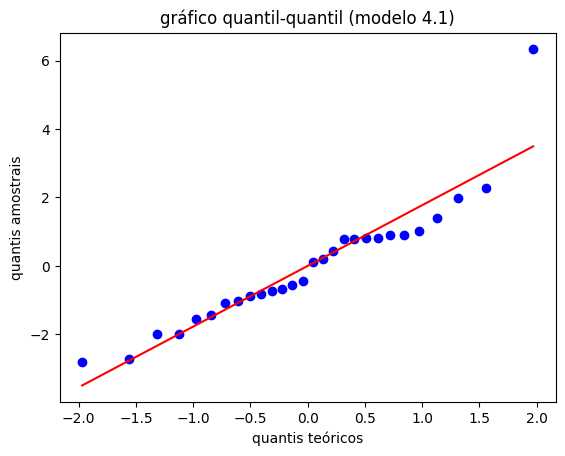

In [ ]:
ss.probplot(residuos41, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 4.1)')
pylab.show()

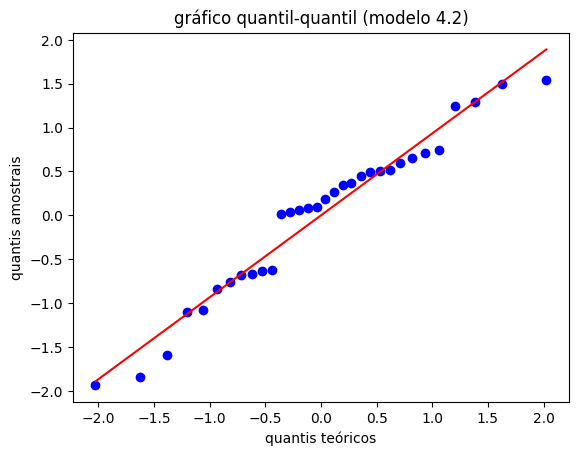

In [ ]:
ss.probplot(residuos42, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 4.2)')
pylab.show()

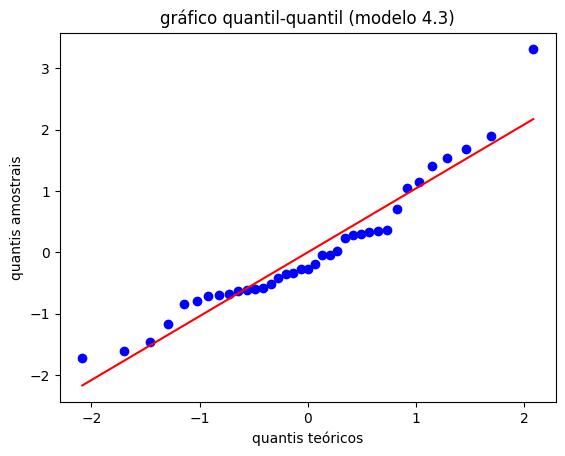

In [ ]:
ss.probplot(residuos43, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 4.3)')
pylab.show()

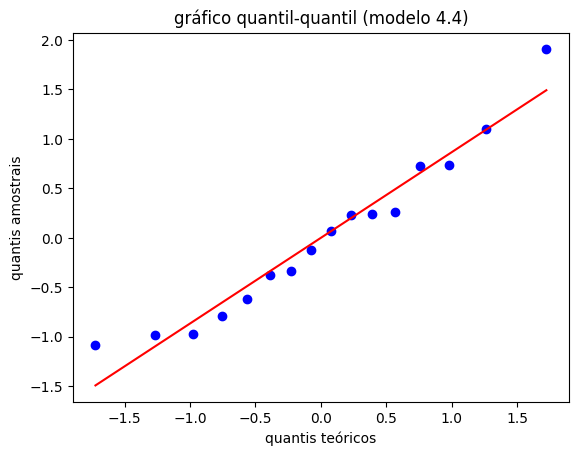

In [ ]:
ss.probplot(residuos44, dist="norm", plot=pylab)
plt.xlabel('quantis teóricos')
plt.ylabel('quantis amostrais')
plt.title('gráfico quantil-quantil (modelo 4.4)')
pylab.show()

Com base na análise gráfica, é razoavel concluir que os modelos para as regiões 1, 2, 3 e 4 possuem erros com distribuição normal, o que nos permitiria assumir outras conclusões acerca da qualidade e interpretabilidade do ajuste de um modelo linear para esses dados.